Two Types of Classification Modeling:

-Topic Modeling using LDA
-Naive Bayes + TF-IDF

# Part 1: Topic Modeling with LDA (Gensim) - Unsupervised Classification

In [1]:
# Topic Modeling using LDA + Gensim
import pandas as pd
import pickle

data = pd.read_pickle('meta_dtm_stop.pkl')
#data

In [2]:
# Import Gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging for tuning hyperparameters
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
# Need to input the Document-Term Matrix
tdm = data.transpose()
tdm.head()

podcast_id,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abductions,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdullahs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Put the Doc-Term Matrix into gensim format
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [5]:
# Another requirement for gensim - dict of all terms and respective location in the doc-term matrix
cv = pickle.load(open("meta_cv_stop.pkl","rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

# Initial Model - No Parts-Of-Speech 

In [6]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, passes=100)
lda.print_topics()

[(0,
  '0.014*"fantasy" + 0.011*"culture" + 0.011*"football" + 0.011*"episode" + 0.010*"news" + 0.010*"society" + 0.008*"history" + 0.008*"new" + 0.006*"education" + 0.006*"daily"'),
 (1,
  '0.013*"bachelor" + 0.008*"science" + 0.008*"becca" + 0.007*"new" + 0.007*"week" + 0.006*"killers" + 0.006*"really" + 0.005*"news" + 0.005*"advice" + 0.005*"hour"'),
 (2,
  '0.017*"tom" + 0.014*"life" + 0.014*"mindset" + 0.014*"segura" + 0.013*"business" + 0.012*"christina" + 0.009*"rob" + 0.007*"education" + 0.006*"master" + 0.006*"understand"'),
 (3,
  '0.018*"real" + 0.013*"estate" + 0.013*"biggerpockets" + 0.008*"episode" + 0.007*"zack" + 0.007*"marc" + 0.007*"business" + 0.006*"joe" + 0.006*"series" + 0.006*"morris"'),
 (4,
  '0.010*"news" + 0.009*"crime" + 0.009*"true" + 0.008*"business" + 0.007*"history" + 0.007*"people" + 0.007*"society" + 0.007*"episodes" + 0.006*"stories" + 0.006*"american"'),
 (5,
  '0.008*"health" + 0.008*"life" + 0.007*"episode" + 0.006*"favorite" + 0.006*"live" + 0.006

In [9]:
# Reading in clean dataset 
data_clean = pd.read_pickle('meta_data_clean.pkl')
#data_clean

In [10]:
# new doc term matrix
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

#Add podcast as a stop word again
add_stop_words = ['podcast']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Initialize Doc-Term Matrix with only nouns
data_cv = cv.fit_transform(data_clean.metacorpus)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
#data_dtm

In [11]:
# Export Results to Excel by copying the returned values below
# Evaluate how each podcast was classified
corpus_transformed = lda[corpus]
list(zip(data_dtm.index, [a for a in corpus_transformed]))

[('1', [(0, 0.98713654)]),
 ('2', [(0, 0.97691262)]),
 ('3', [(0, 0.98713577)]),
 ('4', [(0, 0.86589777), (6, 0.12567401)]),
 ('5', [(0, 0.40076774), (1, 0.58883613)]),
 ('6', [(0, 0.43532389), (1, 0.55133349)]),
 ('7', [(4, 0.9826833)]),
 ('8', [(4, 0.98042709)]),
 ('9', [(4, 0.45054406), (9, 0.53084069)]),
 ('10', [(3, 0.98199213)]),
 ('11', [(4, 0.98162472)]),
 ('12', [(3, 0.98084223)]),
 ('13', [(1, 0.65315336), (4, 0.33742958)]),
 ('14', [(1, 0.98815453)]),
 ('15', [(1, 0.98915273)]),
 ('16', [(1, 0.98940825)]),
 ('17', [(1, 0.96560282), (4, 0.024637373)]),
 ('18', [(0, 0.25121674), (1, 0.66072345), (4, 0.078052029)]),
 ('19', [(3, 0.98392284)]),
 ('20', [(4, 0.98392344)]),
 ('21', [(3, 0.98268634)]),
 ('22', [(4, 0.98268551)]),
 ('23', [(4, 0.98234725)]),
 ('24', [(3, 0.98392332)]),
 ('25', [(0, 0.56027913), (1, 0.43187258)]),
 ('26', [(0, 0.99173892)]),
 ('27', [(0, 0.43345347), (1, 0.55987477)]),
 ('28', [(0, 0.65379035), (6, 0.33731583)]),
 ('29', [(0, 0.98953021)]),
 ('30', [

# Add Parts-Of-Speech (Nouns-only)

In [12]:
# Attempt 2: Part-of-Speech (Nouns Only)
# Try to classify with nouns only (parts-of-speech)

from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Takes a word or string, create a 'token' and take only the nouns from text '''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word,pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [13]:
# Reading in clean dataset 
data_clean = pd.read_pickle('meta_data_clean.pkl')
#data_clean

In [14]:
# Use the nouns function from above to corpii so only nouns remain
data_nouns = pd.DataFrame(data_clean.metacorpus.apply(nouns))
#data_nouns

In [15]:
# Initialize Doc-Term Matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.metacorpus)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
#data_dtmn

In [16]:
# Gensim corpus for nouns DTM
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Gensim vocabulary dict for nouns DTM
id2wordn = dict((v,k) for k, v in cvn.vocabulary_.items())

In [17]:
# Same as before, start with 10 topics, update passes as I go
ldan = models.LdaModel(corpus=corpusn, num_topics=10, id2word=id2wordn, passes=100)
ldan.print_topics()

[(0,
  '0.018*"education" + 0.017*"life" + 0.017*"business" + 0.012*"freakonomics" + 0.011*"ramsey" + 0.011*"kids" + 0.009*"things" + 0.008*"culture" + 0.008*"finance" + 0.008*"fitness"'),
 (1,
  '0.016*"science" + 0.015*"health" + 0.012*"walter" + 0.011*"maintenance" + 0.010*"phase" + 0.010*"junk" + 0.010*"education" + 0.009*"history" + 0.009*"scams" + 0.009*"fads"'),
 (2,
  '0.025*"life" + 0.018*"business" + 0.015*"people" + 0.013*"news" + 0.011*"education" + 0.009*"mindset" + 0.009*"culture" + 0.008*"killers" + 0.007*"moth" + 0.007*"stories"'),
 (3,
  '0.018*"estate" + 0.017*"biggerpockets" + 0.012*"news" + 0.012*"crime" + 0.010*"time" + 0.010*"meditation" + 0.009*"stories" + 0.009*"friends" + 0.008*"simmons" + 0.007*"sports"'),
 (4,
  '0.015*"talks" + 0.015*"beauty" + 0.014*"news" + 0.010*"people" + 0.009*"armchair" + 0.009*"culture" + 0.007*"society" + 0.007*"dan" + 0.007*"comedy" + 0.007*"join"'),
 (5,
  '0.011*"crime" + 0.009*"emma" + 0.009*"stories" + 0.009*"episodes" + 0.008*"

In [ ]:
# Export Results to Excel by copying the returned values below
# Evaluate how each podcast was classified
#corpus_transformedn = ldan[corpusn]
#list(zip(data_dtmn.index, [a for a in corpus_transformedn]))

# Add Parts-Of-Speech (Nouns+Adjectives)

In [18]:
# Attempt 3: Parts-of-Speech (Nouns+Adj)

def nouns_adj(text):
    '''Takes a string, provides token for text and pulls out only nouns and adj'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [19]:
data_nouns_adj = pd.DataFrame(data_clean.metacorpus.apply(nouns_adj))
#data_nouns_adj

In [20]:
cvna = CountVectorizer(stop_words=stop_words)
data_cvna = cvna.fit_transform(data_nouns_adj.metacorpus)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
#data_dtmna

In [21]:
# Gensim corpus for nouns+adj DTM
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Gensim vocabulary dict for nouns DTM
id2wordna = dict((v,k) for k, v in cvna.vocabulary_.items())

In [24]:
# Start with 10 topics, use 100 passes to be thorough, then 20 topics for comparison
ldana = models.LdaModel(corpus=corpusna, num_topics=20, id2word=id2wordna, passes=100)
ldana.print_topics()
# After it runs once, update to topics = 20 and run again

[(0,
  '0.018*"talks" + 0.017*"film" + 0.015*"movie" + 0.013*"expert" + 0.012*"armchair" + 0.012*"daily" + 0.012*"people" + 0.011*"dax" + 0.011*"tv" + 0.010*"human"'),
 (1,
  '0.018*"culture" + 0.017*"freakonomics" + 0.016*"education" + 0.014*"peterson" + 0.014*"society" + 0.014*"new" + 0.013*"history" + 0.013*"books" + 0.013*"jordan" + 0.012*"things"'),
 (2,
  '0.038*"kids" + 0.034*"history" + 0.024*"education" + 0.024*"stuff" + 0.022*"society" + 0.022*"culture" + 0.017*"family" + 0.015*"class" + 0.014*"crime" + 0.014*"true"'),
 (3,
  '0.035*"business" + 0.018*"news" + 0.011*"journal" + 0.011*"bit" + 0.010*"optimism" + 0.009*"new" + 0.008*"best" + 0.008*"life" + 0.008*"joe" + 0.008*"human"'),
 (4,
  '0.012*"adam" + 0.009*"emails" + 0.009*"cal" + 0.007*"science" + 0.007*"gazzaley" + 0.007*"psychedelic" + 0.007*"messages" + 0.007*"email" + 0.007*"scientific" + 0.007*"brain"'),
 (5,
  '0.040*"fantasy" + 0.033*"football" + 0.032*"bachelor" + 0.018*"becca" + 0.014*"happy" + 0.013*"hour" + 

In [25]:
# Evaluate how each podcast was classified
# Exporting to Excel for making cleaner, prettier tables for summarization
corpus_transformedna = ldana[corpusna]
list(zip(data_dtmna.index, [a for a in corpus_transformedna]))

[('1', [(11, 0.9813692)]),
 ('2', [(11, 0.97120756)]),
 ('3', [(10, 0.59113926), (11, 0.39249426)]),
 ('4', [(11, 0.31942436), (14, 0.66753095)]),
 ('5', [(3, 0.6115039), (11, 0.37373856)]),
 ('6', [(11, 0.97840613)]),
 ('7', [(11, 0.97682428)]),
 ('8', [(11, 0.97205317)]),
 ('9', [(11, 0.97120607)]),
 ('10', [(11, 0.97285247)]),
 ('11', [(11, 0.97682434)]),
 ('12', [(11, 0.97205383)]),
 ('13', [(11, 0.98442417)]),
 ('14', [(7, 0.3683767), (11, 0.61525613)]),
 ('15', [(11, 0.98467559)]),
 ('16', [(11, 0.68607217), (16, 0.29840738)]),
 ('17', [(11, 0.65706223), (16, 0.32818052)]),
 ('18', [(11, 0.98137033)]),
 ('19', [(3, 0.97888613)]),
 ('20', [(3, 0.61374652), (11, 0.36709946)]),
 ('21', [(3, 0.97888654)]),
 ('22', [(3, 0.6559732), (14, 0.32259622)]),
 ('23', [(3, 0.97624767)]),
 ('24', [(3, 0.97888672)]),
 ('25', [(17, 0.98826987)]),
 ('26', [(6, 0.42900747), (17, 0.56027508)]),
 ('27', [(17, 0.98955888)]),
 ('28', [(17, 0.98680365)]),
 ('29', [(6, 0.39973184), (17, 0.58683145)]),
 (

# Part 2: Naive Bayes - Supervised Classification

In [26]:
# Load packages used
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

In [84]:
# Reading in clean dataset 
data_clean = pd.read_pickle('meta_data_clean.pkl')
# Add Actual Category to dataframe since this is supervised classification
data_clean['target_categories'] = ['News','News','News','News','News','News','News','News','News','News',
                      'News','News','News','News','News','News','News','News','News','News',
                      'News','News','News','News','News','News','News','News','News','News',
                      'Education','Education','Education','Education','Education','Education',
                      'Education','Education','Education','Education','Education','Education',
                      'Education','Education','Education','Education','Education','Education',
                      'Education','Education','Education','Education','Education','Education',
                      'Education','Education','Education','Education','Education','Education',
                      'Comedy','Comedy','Comedy','Comedy','Comedy','Comedy','Comedy','Comedy','Comedy','Comedy',
                      'Comedy','Comedy','Comedy','Comedy','Comedy','Comedy','Comedy','Comedy','Comedy','Comedy',
                      'Comedy','Comedy','Comedy','Comedy','Comedy','Comedy','Comedy','Comedy','Comedy','Comedy',
                      'True Crime','True Crime','True Crime','True Crime','True Crime','True Crime',
                      'True Crime','True Crime','True Crime','True Crime','True Crime','True Crime',
                      'True Crime','True Crime','True Crime','True Crime','True Crime','True Crime',
                      'True Crime','True Crime','True Crime','True Crime','True Crime','True Crime',
                      'True Crime','True Crime','True Crime','True Crime','True Crime','True Crime',
                      'Sports','Sports','Sports','Sports','Sports','Sports','Sports','Sports','Sports','Sports',
                      'Sports','Sports','Sports','Sports','Sports','Sports','Sports','Sports','Sports','Sports',
                      'Sports','Sports','Sports','Sports','Sports','Sports','Sports','Sports','Sports','Sports',
                      'Health','Health','Health','Health','Health','Health','Health','Health','Health','Health',
                      'Health','Health','Health','Health','Health','Health','Health','Health','Health','Health',
                      'Health','Health','Health','Health','Health','Health','Health','Health','Health','Health',
                      'TV','TV','TV','TV','TV','TV','TV','TV','TV','TV',
                      'TV','TV','TV','TV','TV','TV','TV','TV','TV','TV',
                      'TV','TV','TV','TV','TV','TV','TV','TV','TV','TV',
                      'Arts','Arts','Arts','Arts','Arts','Arts','Arts','Arts','Arts','Arts',
                      'Arts','Arts','Arts','Arts','Arts','Arts','Arts','Arts','Arts','Arts',
                      'Arts','Arts','Arts','Arts','Arts','Arts','Arts','Arts','Arts','Arts',
                      'Business & Technology','Business & Technology','Business & Technology','Business & Technology','Business & Technology',
                      'Business & Technology','Business & Technology','Business & Technology','Business & Technology','Business & Technology',
                      'Business & Technology','Business & Technology','Business & Technology','Business & Technology','Business & Technology',
                      'Business & Technology','Business & Technology','Business & Technology','Business & Technology','Business & Technology',
                      'Business & Technology','Business & Technology','Business & Technology','Business & Technology','Business & Technology',
                      'Business & Technology','Business & Technology','Business & Technology','Business & Technology','Business & Technology',
                      'History','History','History','History','History','History','History','History','History','History',
                     'History','History','History','History','History','History','History','History','History','History',
                     'History','History','History','History','History','History','History','History','History','History']
# Don't need the number ID for this
data_clean = data_clean.drop('num_id',axis=1)
data_clean.head()

,metacorpus,target_categories
podcast_id,,
1,the daily this is what the news should sound l...,News
2,the daily this is what the news should sound l...,News
3,the daily this is what the news should sound l...,News
4,the daily this is what the news should sound l...,News
5,the daily this is what the news should sound l...,News


In [96]:
data_clean.iloc[:,0].values

array([ 'the daily this is what the news should sound like the biggest stories of our time told by the best journalists in the world hosted by michael barbaro twenty minutes a day five days a week ready by  am daily news news politics business targeting overseas tax shelters the irs says that bristol myers squibb america’s secondlargest drug company has engaged a taxshelter setup that has deprived the united states of  billion in tax revenue the biden administration is looking to put an end to such practices to pay for its policy ambitions including infrastructure like improving roads and bridges and revitalizing cities we look at the structure of these tax arrangements and explore how and whether it’s possible to clamp down on them',
       'the daily this is what the news should sound like the biggest stories of our time told by the best journalists in the world hosted by michael barbaro twenty minutes a day five days a week ready by  am daily news news politics business a vast web o

In [97]:
# Get the text categories
text_categories = data_clean.target_categories
# Split into Training and Test subsets
from sklearn.model_selection import train_test_split
# define the training set
#y = data_clean[['target_categories']]
#X = data_clean[['metacorpus']]
# Convert to arrays
train, test = train_test_split(data_clean,test_size=0.2, random_state=41)
X_test = test.iloc[:,0].values
y_test = test.iloc[:,1].values
X_train = train.iloc[:,0].values
y_train = train.iloc[:,1].values

In [98]:
# Validate split correctly 80/20 Train/Test
print("We have {} training samples".format(len(X_train)))
print("We have {} test samples".format(len(X_test)))

We have 240 training samples
We have 60 test samples


In [103]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(X_train, y_train)
# Predict the categories of the test data
predicted_categories = model.predict(X_test)

In [124]:
test

,metacorpus,target_categories
podcast_id,,
198,film on the rocks we are the fun conversation ...,TV
52,biggerpockets real estate podcast imagine you ...,Education
127,spittin chiclets former nhl vets ryan whitney ...,Sports
260,lex fridman podcast conversations about scienc...,Business & Technology
152,on purpose with jay shetty my name is jay shet...,Health
150,the bill simmons podcast hbo and the ringers b...,Sports
15,pod save america four former aides to presiden...,News
264,lex fridman podcast conversations about scienc...,Business & Technology
88,smartless new episodes come out every monday f...,Comedy


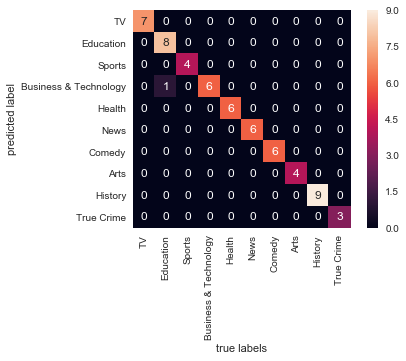

In [119]:

# Plot Confusion Matrix
mat = confusion_matrix(y_test, predicted_categories)
mat
lab = ['Arts','Education','Sports','Business & Technology','Health', 'News', 'Comedy', 'History','TV', 'True Crime']
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=lab,yticklabels=lab)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_test, predicted_categories)))